# Questions:
1. Where do the guests come from?
2. How much do guests pay for a room per night?
3. How does the price per night vary over the year?
4. Which are the busiest months?
5. How long do people stay at the hotels?
6. Bookings by market segment
7. How many bookings were cancelled?
8. Which month has the highest number of cancellations?

In [107]:
# import lybrary
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy import percentile
from numpy.random import rand
import pylab

In [108]:
os.chdir('D:/Karir/Iykra Fellowship/task/week 3/Data Analysis')
dc_ritz = pd.read_excel('data_dictionary_Ritz_jager.xlsx')
ritz_jager = pd.read_csv('Ritz_Jager_Data.csv')

In [109]:
ritz_jager.shape

(119390, 32)

In [110]:
ritz_jager.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [111]:
ritz_jager.dtypes

hotel_type                         object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal_type                          object
country_origin                     object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [112]:
# missing values
ritz_jager.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country_origin                       488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal_type                              0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [113]:
#checking missing values
ritz_jager.isnull().sum().sort_values(ascending = False).head()/len(ritz_jager)

company           0.943069
agent             0.136862
country_origin    0.004087
children          0.000034
lead_time         0.000000
dtype: float64

In [114]:
ritz_jager[['company','agent','country_origin','children']]

,company,agent,country_origin,children
0,NaN,NaN,PRT,0.0
1,NaN,NaN,PRT,0.0
2,NaN,NaN,GBR,0.0
3,NaN,304.0,GBR,0.0
4,NaN,240.0,GBR,0.0
...,...,...,...,...
119385,NaN,394.0,BEL,0.0
119386,NaN,9.0,FRA,0.0
119387,NaN,9.0,DEU,0.0
119388,NaN,89.0,GBR,0.0


In [115]:
ritz_jager['country_origin'].value_counts().sort_values(ascending = False)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BHS        1
PYF        1
DMA        1
BFA        1
SMR        1
Name: country_origin, Length: 177, dtype: int64

# handling missing values: 

1. drop company because 90% missing values
2. country origin handling with mode
3. childre maybe mean or median
4. agent maybe mean or median
5. lead time maybe mean or median

In [116]:
# 1. drop company column
ritz_jager = ritz_jager.drop('company',axis = 1)

In [117]:
# 2. handling country_origin with mode
ritz_jager['country_origin'].fillna('PRT', inplace = True)

In [118]:
ritz_jager.isnull().sum().sort_values(ascending=False)

agent                             16340
children                              4
reservation_status_date               0
market_segment                        0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
babies                                0
meal_type                             0
country_origin                        0
distribution_channel                  0
reservation_status                    0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0


In [119]:
ritz_jager['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [120]:
# 3, 4 replace with median
ritz_jager['agent'].fillna(ritz_jager['agent'].mode()[0], inplace =True)
ritz_jager['children'].fillna(ritz_jager['children'].mode()[0], inplace =True)

In [121]:
# clean data
ritz_jager.isnull().sum().sort_values(ascending=False)

reservation_status_date           0
market_segment                    0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal_type                         0
country_origin                    0
distribution_channel              0
reservation_status                0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                         

In [122]:
ritz_jager.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [123]:
# changing data type
ritz_jager.dtypes

hotel_type                         object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal_type                          object
country_origin                     object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [124]:
# convert datetime
from datetime import datetime
ritz_jager['date_reservation_status'] = pd.to_datetime(ritz_jager['reservation_status_date'],format = '%d/%m/%Y')

In [125]:
ritz_jager[['date_reservation_status']]

,date_reservation_status
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03
...,...
119385,2017-09-06
119386,2017-09-07
119387,2017-09-07
119388,2017-09-07


In [126]:
ritz_jager[ritz_jager.duplicated(subset=None, keep=False)]

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date_reservation_status
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,3/7/2015,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,3/7/2015,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,7/7/2015,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,7/7/2015,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,7/7/2015,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,3/9/2017,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,3/9/2017,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,3/9/2017,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,No Deposit,42.0,0,Transient,82.35,0,1,Check-Out,4/9/2017,2017-09-04


# 1. Where do the guests come from?

The most common guests from Portugal


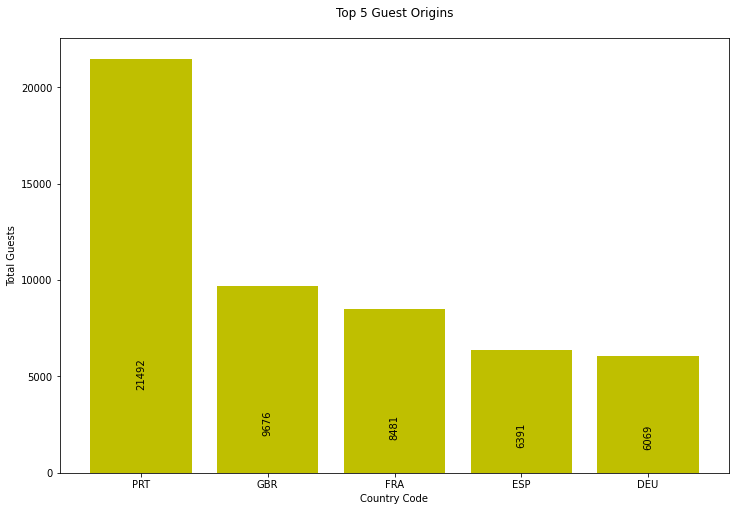

In [127]:

g_from = ritz_jager[['country_origin','is_canceled']]#.value_counts()#.rename_axis('country_code').reset_index(name='counts').head()
fix = g_from[g_from['is_canceled'] == 0]
ax, fig = plt.subplots(figsize = (12,8))
fix = fix['country_origin'].value_counts().rename_axis('country_code').reset_index(name='counts').head()
bar_plots = plt.bar(fix['country_code'],fix['counts'], color = 'y')
def autolabel(rects):
    for idx,rect in enumerate(bar_plots):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 0.2*height,
                fix['counts'].unique().tolist()[idx],
                ha='center', va='bottom', rotation=90)
autolabel(bar_plots)
plt.title('Top 5 Guest Origins\n')
plt.xlabel('Country Code')
plt.ylabel('Total Guests')
print("The most common guests from Portugal")

# 2. How much do guests pay for a room per night?


Text(0.5, 1.0, 'Adr Skew Check')

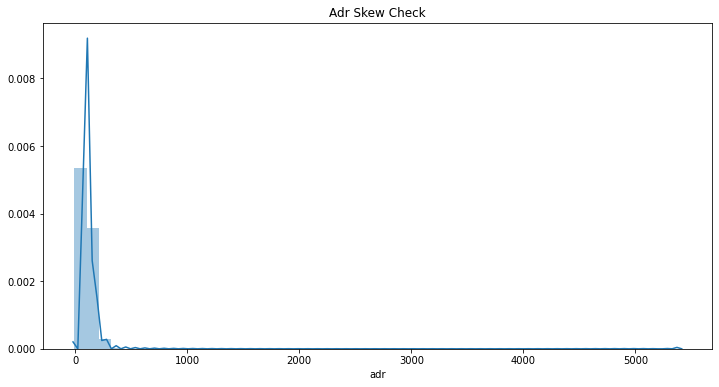

In [128]:
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(ritz_jager['adr'])
ax.set_title("Adr Skew Check")

Text(0.5, 1.0, 'adr Boxplot')

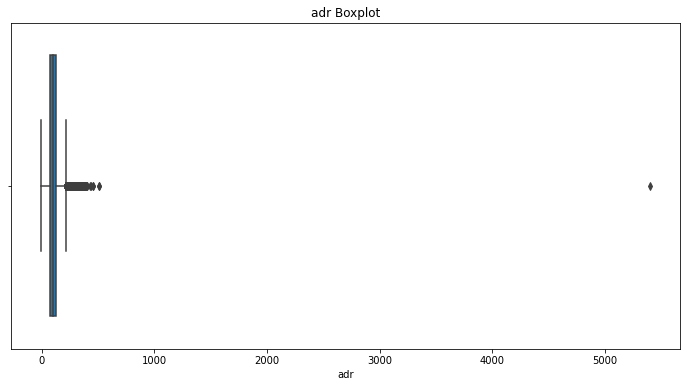

In [129]:
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(ritz_jager['adr'])
ax.set_title("adr Boxplot")

In [130]:
#seeing adr outlier
s = ritz_jager['adr']
print(f"Q1 :{np.quantile(s, .25)}")
print(f"Q2 :{np.quantile(s, .50)}")
print(f"Q3 :{np.quantile(s, .75)}")
iqr = (np.quantile(s, .75))-(np.quantile(s, .25))
print(f"IQR: {iqr}")
print(f"Lower outlier: {np.quantile(s, .25)-(1.5*iqr)}")
print(f"Higher Outlier: {np.quantile(s, .75)+(1.5*iqr)}")
f = []
higher_outlier = np.quantile(s, .75)+(1.5*iqr)
for i in s:
    if i > 211.065:
        f.append(i)
print(f"Sum of outlier: {len(f)}")
ritz_jager[['adr','stays_in_weekend_nights']]
print(f"The average payment per night for guest: {ritz_jager['adr'].median()}")

Q1 :69.29
Q2 :94.575
Q3 :126.0
IQR: 56.709999999999994
Lower outlier: -15.774999999999991
Higher Outlier: 211.065
Sum of outlier: 3793
The average payment per night for guest: 94.575


In [131]:
ritz_jager['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

# 3. How does the price per night vary over the year?

Text(0, 0.5, 'Average Price')

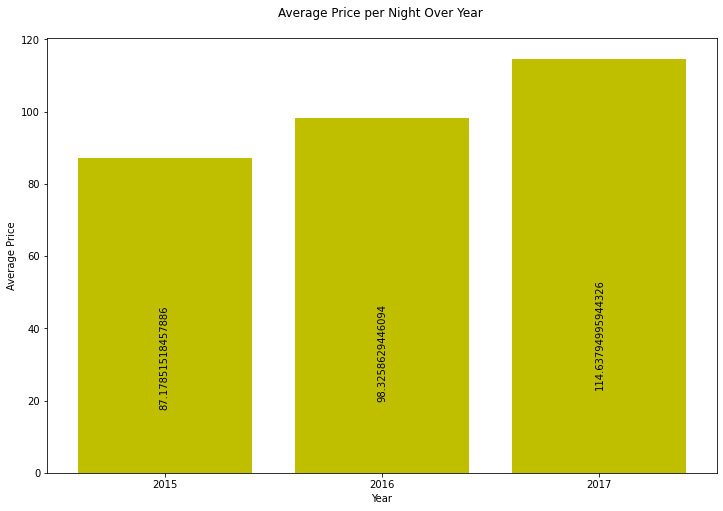

In [132]:

s = ritz_jager[['arrival_date_year','adr',]].groupby('arrival_date_year').mean().reset_index()

ax, fig = plt.subplots(figsize = (12,8))
bar_plots = plt.bar(s['arrival_date_year'],s['adr'], tick_label = s['arrival_date_year'].unique(), color = 'y')
def autolabel(rects):
    for idx,rect in enumerate(bar_plots):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 0.2*height,
                s['adr'].unique().tolist()[idx],
                ha='center', va='bottom', rotation=90)
autolabel(bar_plots)
plt.title('Average Price per Night Over Year \n')
plt.xlabel('Year')
plt.ylabel('Average Price')

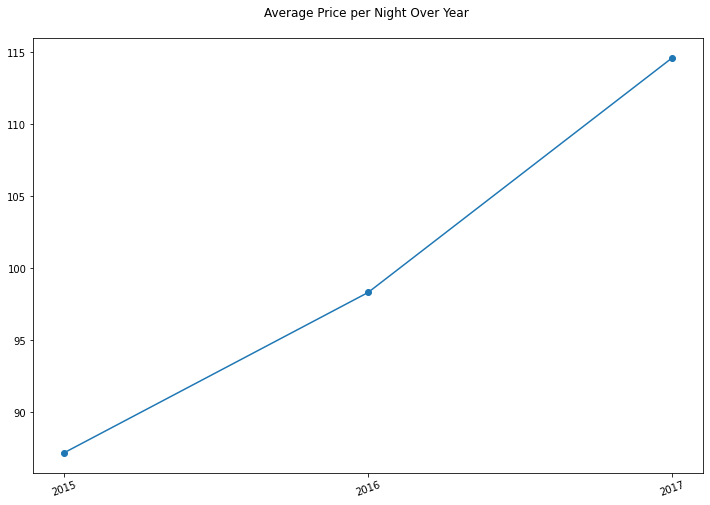

In [133]:
ax, fig = plt.subplots(figsize = (12,8))
plt.plot(s['arrival_date_year'], s['adr'], marker = 'o')
plt.xticks(s['arrival_date_year'], rotation=20)
plt.title('Average Price per Night Over Year \n')
plt.show()

# 4. Which are the busiest months?

Text(0, 0.5, 'Sum Guest Arrival')

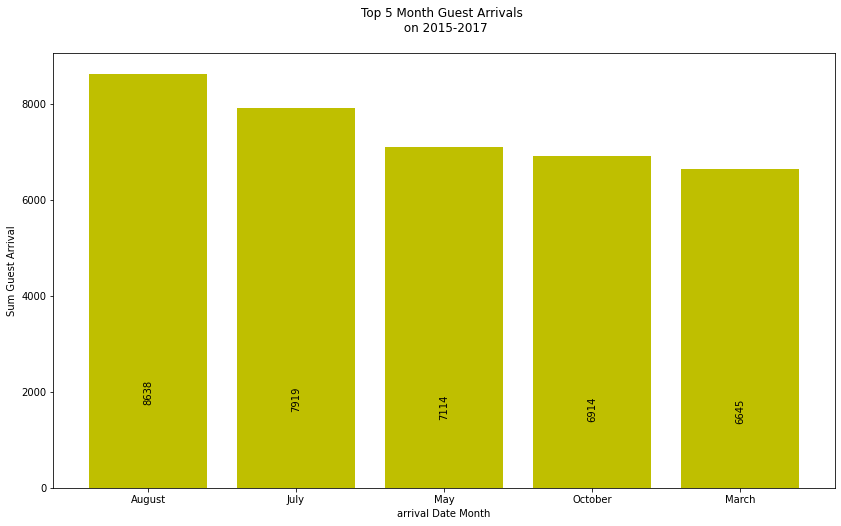

In [134]:

ok = ritz_jager[['arrival_date_month','is_canceled']]['is_canceled'] == 0
busiest = ritz_jager[['arrival_date_month','is_canceled']][ok].groupby('arrival_date_month').count().reset_index().sort_values('is_canceled', ascending = False).head(5)
ax, fig = plt.subplots(figsize = (14,8))
bar_plots = plt.bar(busiest['arrival_date_month'],busiest['is_canceled'], color = 'y')
def autolabel(rects):
    for idx,rect in enumerate(bar_plots):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 0.2*height,
                busiest['is_canceled'].unique().tolist()[idx],
                ha='center', va='bottom', rotation=90)
autolabel(bar_plots)
plt.title('Top 5 Month Guest Arrivals \n on 2015-2017\n')
plt.xlabel('arrival Date Month')
plt.ylabel('Sum Guest Arrival')

# 5. How long do people stay at the hotels?

In [135]:

ritz_jager[['stays_in_weekend_nights','stays_in_week_nights']].describe()

,stays_in_weekend_nights,stays_in_week_nights
count,119390.000000,119390.000000
mean,0.927599,2.500302
std,0.998613,1.908286
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,19.000000,50.000000


Text(0.5, 1.0, 'Boxplot week_nights')

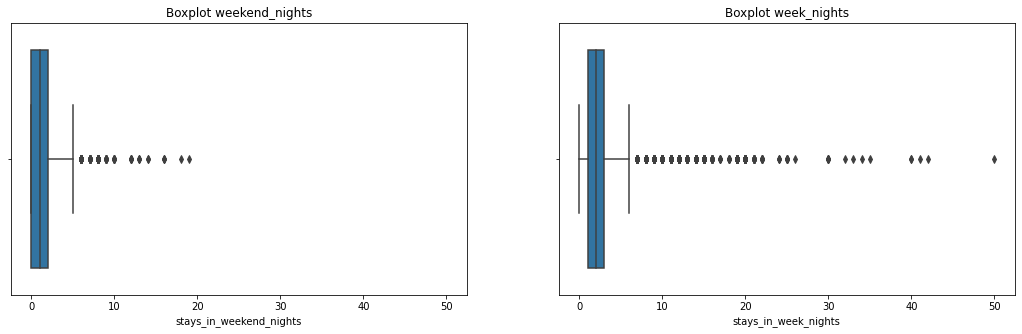

In [136]:
f = ritz_jager[['stays_in_weekend_nights','stays_in_week_nights']]
f['stays_in_weekend_nights']
f['stays_in_week_nights']
fig,axes = plt.subplots(1,2,figsize = (18,5), sharex = True, sharey=True)
sns.boxplot(f['stays_in_weekend_nights'], ax = axes[0]).set_title('Boxplot weekend_nights')
sns.boxplot(f['stays_in_week_nights'], ax = axes[1]).set_title('Boxplot week_nights')

Text(0.5, 1.0, 'Distribution week_nights')

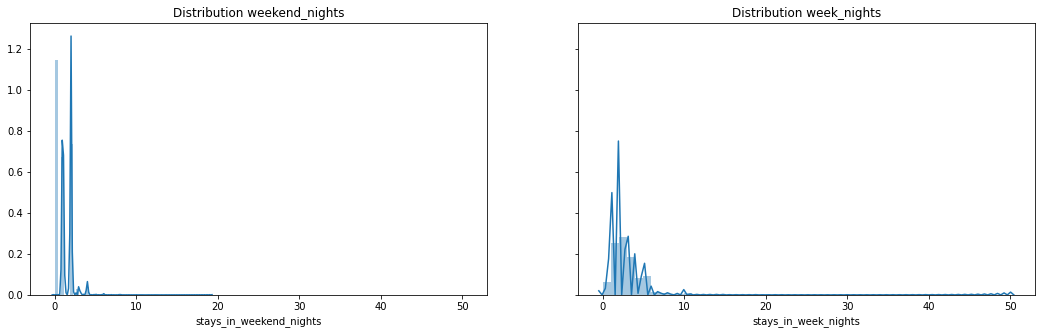

In [137]:
fig,axes = plt.subplots(1,2,figsize = (18,5), sharex = True, sharey=True)
sns.distplot(f['stays_in_weekend_nights'], ax = axes[0]).set_title('Distribution weekend_nights')
sns.distplot(f['stays_in_week_nights'], ax = axes[1]).set_title('Distribution week_nights')

In [138]:
s = f['stays_in_weekend_nights']
print(f"Q1 :{np.quantile(s, .25)}")
print(f"Q2 :{np.quantile(s, .50)}")
print(f"Q3 :{np.quantile(s, .75)}")
iqr = (np.quantile(s, .75))-(np.quantile(s, .25))
print(f"IQR: {iqr}")
print(f"Lower outlier: {np.quantile(s, .25)-(1.5*iqr)}")
print(f"Higher Outlier: {np.quantile(s, .75)+(1.5*iqr)}")
r = []
for i in s:
    if i > 5:
        r.append(i)
print(f'Sum of outlier: {len(r)}')

Q1 :0.0
Q2 :1.0
Q3 :2.0
IQR: 2.0
Lower outlier: -3.0
Higher Outlier: 5.0
Sum of outlier: 265


In [139]:
s = f['stays_in_week_nights']
print(f"Q1 :{np.quantile(s, .25)}")
print(f"Q2 :{np.quantile(s, .50)}")
print(f"Q3 :{np.quantile(s, .75)}")
iqr = (np.quantile(s, .75))-(np.quantile(s, .25))
print(f"IQR: {iqr}")
print(f"Lower outlier: {np.quantile(s, .25)-(1.5*iqr)}")
print(f"Higher Outlier: {np.quantile(s, .75)+(1.5*iqr)}")
r = []
for i in s:
    if i > 6:
        r.append(i)
print(f'Sum of outlier: {len(r)}')

Q1 :1.0
Q2 :2.0
Q3 :3.0
IQR: 2.0
Lower outlier: -2.0
Higher Outlier: 6.0
Sum of outlier: 3354


# 6. Bookings by market segment

Text(0, 0.5, 'Total of books')

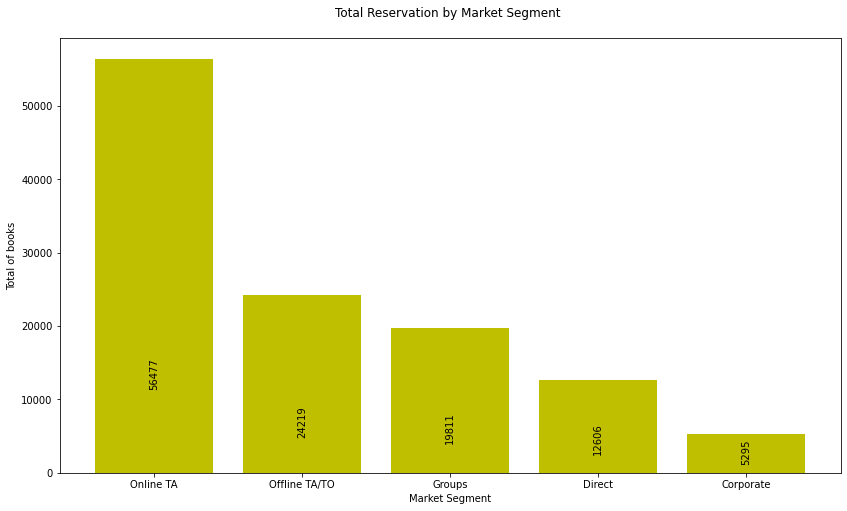

In [140]:

books_segment = ritz_jager[['is_canceled','market_segment']].groupby('market_segment').count().reset_index().sort_values(by = 'is_canceled', ascending=False).head()
ax, fig = plt.subplots(figsize = (14,8))
bar_plots = plt.bar(books_segment['market_segment'],books_segment['is_canceled'], color = 'y')
label = [56477, 24219, 19811, 12606, 5295, '', '', '']
def autolabel(rects):
    for idx,rect in enumerate(bar_plots):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 0.2*height,
                label[idx],
                ha='center', va='bottom', rotation=90)
autolabel(bar_plots)
plt.title('Total Reservation by Market Segment \n')
plt.xlabel('Market Segment')
plt.ylabel('Total of books')

In [141]:
ritz_jager['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72], dtype=int64)

# 7. How many bookings were cancelled?

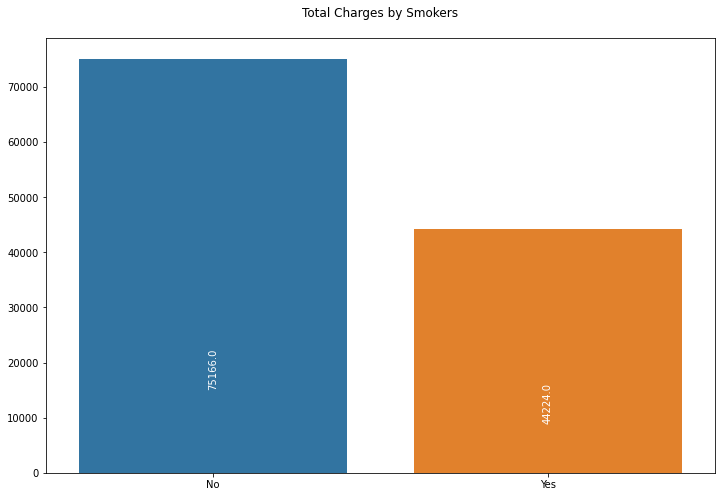

In [142]:

fig, ax = plt.subplots(figsize = (12,8))
s = ritz_jager['is_canceled'].value_counts().to_frame().T
x = ['No','Yes']
d = [75166,44224]
sns.barplot(x, d, ax = ax)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 0.2 * height,
                height,
                ha='center', va='bottom', rotation=90, color='white')

autolabel(ax.patches)
ax.set_title('Total Charges by Smokers\n')
plt.show()

C:\Users\ronny\anaconda3\envs\TF env\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


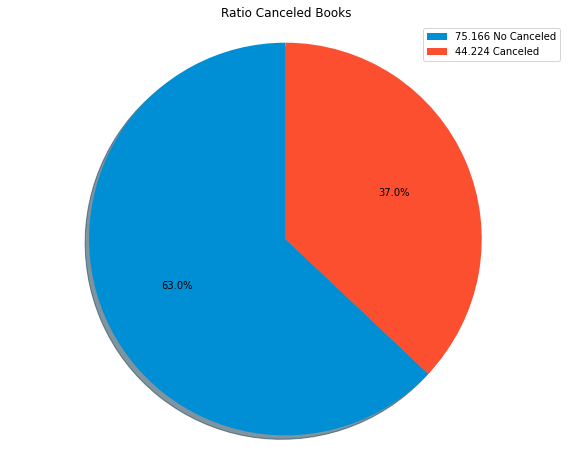

In [143]:
fig, ax = plt.subplots(figsize = (10,8))
colors = ['#008fd5', '#fc4f30']
sizes = s[:]
recipe = ["75.166 No Canceled",
          "44.224 Canceled"]
plt.pie(sizes, colors=colors, shadow=True,
                          startangle=90,autopct='%1.1f%%')

plt.title('Ratio Canceled Books')
plt.legend(labels = recipe, loc="upper right")
plt.axis('equal')
plt.show()

In [146]:
s

,0,1
is_canceled,75166,44224


# 8. Which month has the highest number of cancellations?

In [149]:

ritz_jager['month'] = ritz_jager['date_reservation_status'].map(lambda x: x.month)
cancel = ritz_jager[['month','is_canceled']]
sum_cancel = cancel.groupby(by = 'month').sum().reset_index()
sorteds = sum_cancel.sort_values('is_canceled')
sum_cancel
#['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Des']

,month,is_canceled
0,1,6061
1,2,4358
2,3,3820
3,4,3470
4,5,3138
5,6,2912
6,7,4369
7,8,2688
8,9,2676
9,10,4145


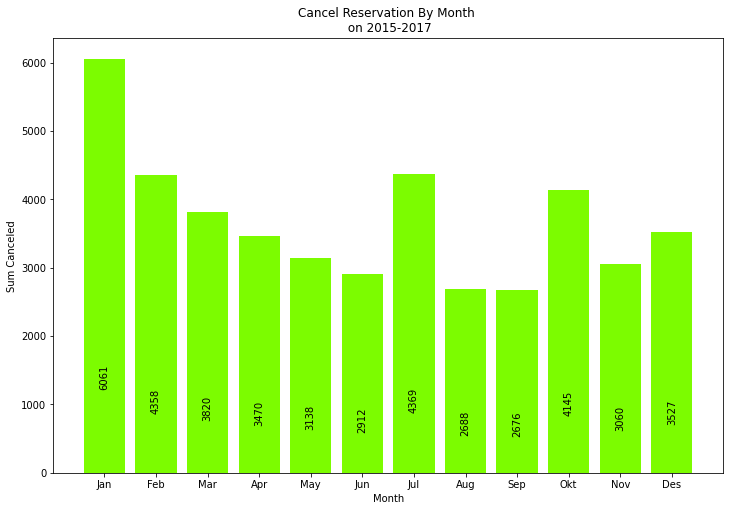

In [150]:
ax, fig = plt.subplots(figsize = (12,8))
bar_plots = plt.bar(sum_cancel['month'],sum_cancel['is_canceled'],
                    color = 'lawngreen', tick_label = ['Jan','Feb','Mar','Apr',
                                                       'May','Jun','Jul','Aug',
                                                       'Sep','Okt','Nov','Des'])
#plt.xticks(sum_cancel['month'])
plt.title('Cancel Reservation By Month \n on 2015-2017')
plt.xlabel('Month')
def autolabel(rects):
    for idx,rect in enumerate(bar_plots):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 0.2*height,
                sum_cancel['is_canceled'][idx],
                ha='center', va='bottom', rotation=90)
autolabel(bar_plots)
plt.ylabel('Sum Canceled')
plt.show()

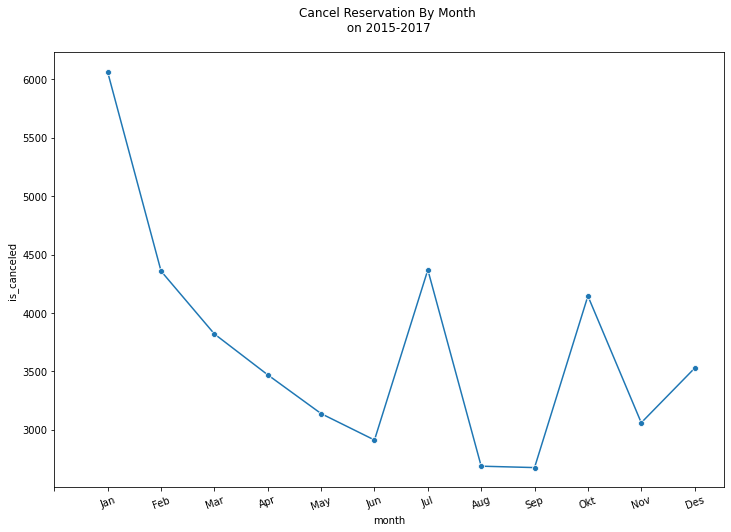

In [164]:
ax, fig = plt.subplots(figsize = (12,8))
sns.lineplot(sum_cancel['month'],sum_cancel['is_canceled'], marker = 'o')
plt.xticks(np.arange(13),('','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Des'), rotation=20)
plt.title('Cancel Reservation By Month \n on 2015-2017 \n')
plt.show()